# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

In [ ]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [ ]:
chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

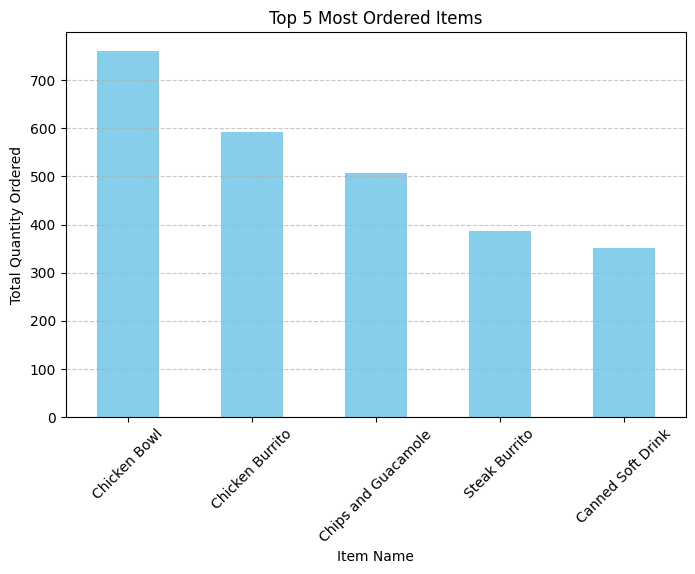

In [ ]:
top_items = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)

top_items.plot(kind='bar', figsize=(8,5), color='skyblue')

plt.title('Top 5 Most Ordered Items')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

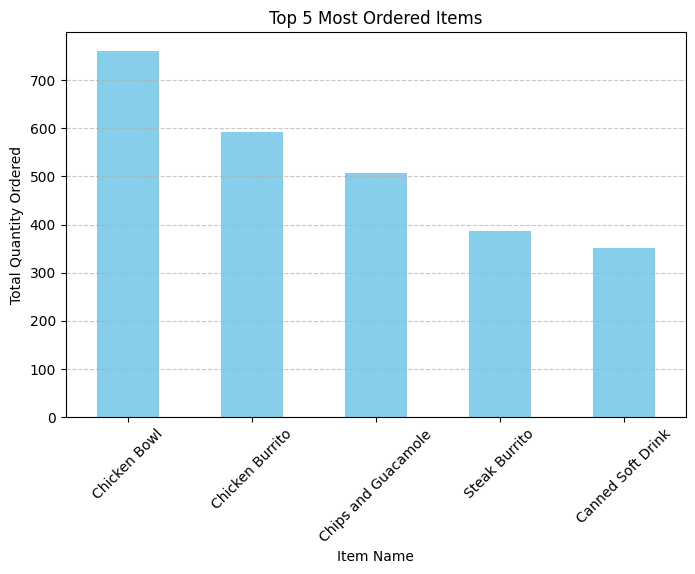

In [ ]:
top_items = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top_items.plot(kind='bar', color='skyblue')

plt.title('Top 5 Most Ordered Items')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Step 7. BONUS: Create a question and a graph to answer your own question.

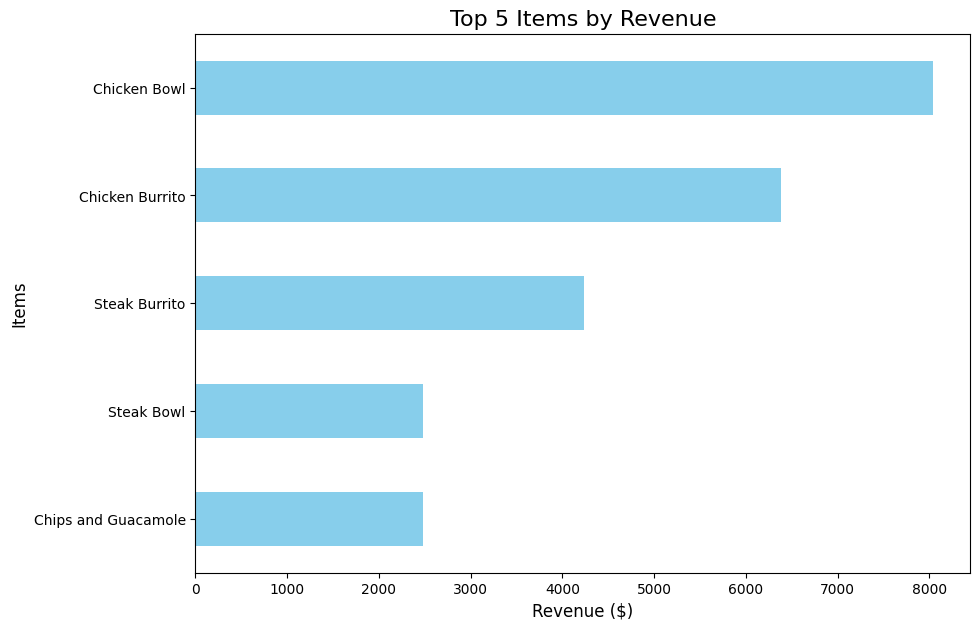

In [ ]:
# 매출을 가장 많이 올린 상품
if chipo['item_price'].dtype == 'object':
    chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

chipo['revenue'] = chipo['quantity'] * chipo['item_price']

revenue_by_item = chipo.groupby('item_name')['revenue'].sum()
top_5_revenue = revenue_by_item.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 7))
top_5_revenue.plot(kind='barh', color='skyblue')
plt.title('Top 5 Items by Revenue', fontsize=16)
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Items', fontsize=12)
plt.gca().invert_yaxis()
plt.show()
